In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import TiffFile
from lxml import etree
import xml.dom.minidom

# Basics of Numpy and TIFF File Management in Python

## Numpy

Learning outcomes:
1. Mental picture of an image when numpy array is shown
2. Shape of Numpy array and what it represents
3. Multidimensional Numpy array

In [6]:
array_2d = np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ]
)

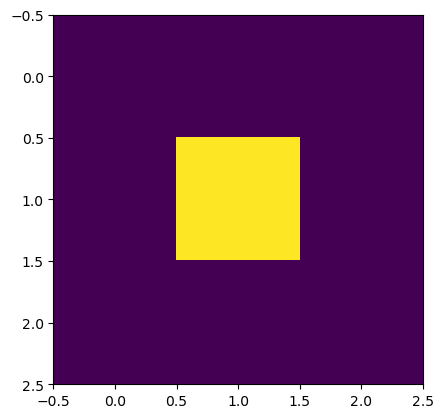

In [7]:
plt.imshow(array_2d)

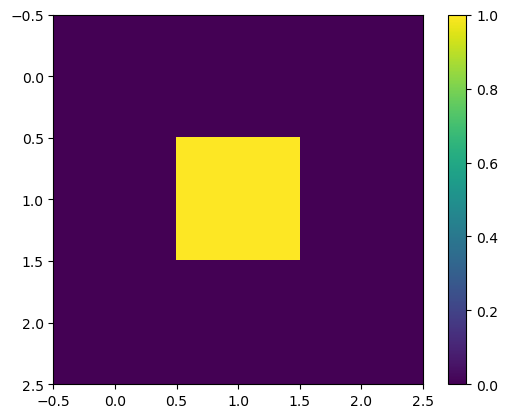

In [8]:
plt.imshow(array_2d)
plt.colorbar()

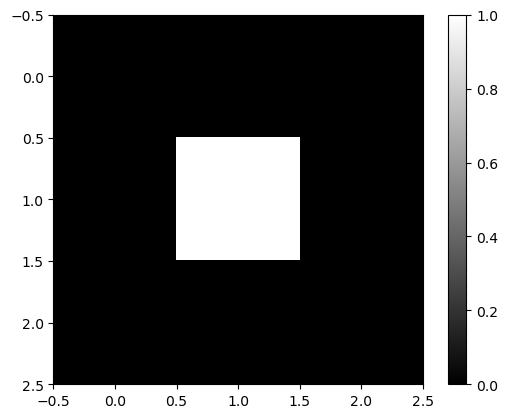

In [9]:
plt.imshow(array_2d, cmap='gray')
plt.colorbar()

In [11]:
frame_1 = [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
        ]

frame_2 = [
        [1, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
        ]

frame_3 = [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
        ]

frame_4 = [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
        ]

frames = np.array(
    [frame_1,
    frame_2,
    frame_3,
    frame_4]
)

frames.shape

(4, 3, 3)

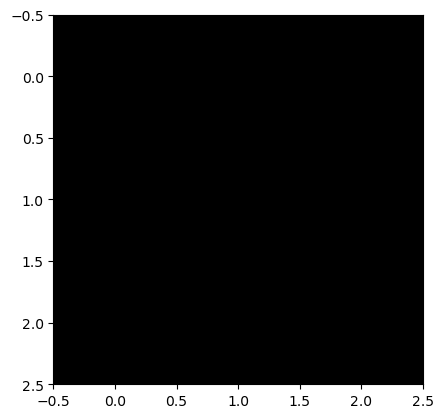

In [12]:
plt.imshow(frames[0], cmap='gray')

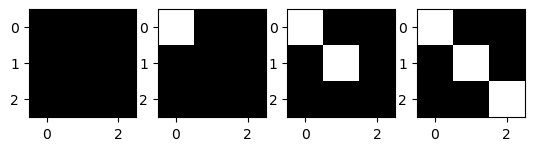

In [15]:
plt.subplot(1,4,1)
plt.imshow(frames[0], cmap='gray')

plt.subplot(1,4,2)
plt.imshow(frames[1], cmap='gray')

plt.subplot(1,4,3)
plt.imshow(frames[2], cmap='gray')

plt.subplot(1,4,4)
plt.imshow(frames[3], cmap='gray')

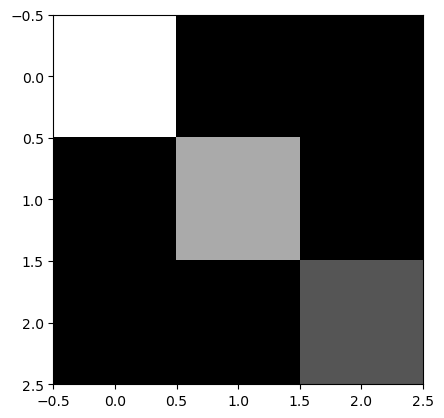

In [18]:
plt.imshow(np.mean(frames, axis=0), cmap='gray')

## TIFF File

## TIFF File Metadata Handling

## OME Data

Learning Outcomes

1. Opening OME file
2. Accessing metadata

In [23]:
ome_file = "../data/multifile-Z1.ome.tiff"
with TiffFile(ome_file) as tif:
    image_data = tif.asarray()
    metadata = tif.ome_metadata

metadata

'<?xml version="1.0" encoding="UTF-8"?><!-- Warning: this comment is an OME-XML metadata block, which contains crucial dimensional parameters and other important metadata. Please edit cautiously (if at all), and back up the original data before doing so. For more information, see the OME-TIFF web site: http://www.openmicroscopy.org/site/support/ome-model/ome-tiff/. --><OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" Creator="OME Bio-Formats 5.2.0-m4" UUID="urn:uuid:d25bfea2-2708-4a4f-bcd9-8ab1ac478041" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd"><Image ID="Image:0" Name="multifile"><AcquisitionDate>2010-03-02T15:08:59</AcquisitionDate><Pixels BigEndian="false" DimensionOrder="XYCTZ" ID="Pixels:0:0" Type="uint8" SizeC="1" SizeT="1" SizeX="18" SizeY="24" SizeZ="5"><Channel Color="-2147483648" ID="Channel:0"/><TiffData FirstC="0" FirstT="

In [27]:
xml_root = etree.fromstring(metadata.encode('utf-8'))
pretty_xml_str = etree.tostring(xml_root, pretty_print=True, encoding='unicode')
pretty_xml_str

'<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" Creator="OME Bio-Formats 5.2.0-m4" UUID="urn:uuid:d25bfea2-2708-4a4f-bcd9-8ab1ac478041" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">\n  <Image ID="Image:0" Name="multifile">\n    <AcquisitionDate>2010-03-02T15:08:59</AcquisitionDate>\n    <Pixels BigEndian="false" DimensionOrder="XYCTZ" ID="Pixels:0:0" Type="uint8" SizeC="1" SizeT="1" SizeX="18" SizeY="24" SizeZ="5">\n      <Channel Color="-2147483648" ID="Channel:0"/>\n      <TiffData FirstC="0" FirstT="0" FirstZ="0" IFD="0" PlaneCount="1">\n        <UUID FileName="multifile-Z1.ome.tiff">urn:uuid:d25bfea2-2708-4a4f-bcd9-8ab1ac478041</UUID>\n      </TiffData>\n      <TiffData FirstC="0" FirstT="0" FirstZ="1" IFD="0" PlaneCount="1">\n        <UUID FileName="multifile-Z2.ome.tiff">urn:uuid:7f283a5c-828e-4dec-955f-1e5ed26773b6</UUID>\n    

In [28]:
with open('metadata.xml', 'w', encoding='utf-8') as file:
    file.write(metadata)


In [29]:
with open('pretty_metadata.xml', 'w', encoding='utf-8') as file:
    file.write(pretty_xml_str)

with inbuilt method

In [31]:
dom = xml.dom.minidom.parseString(metadata)
pretty_xml_str_ib = dom.toprettyxml()

with open('pretty_metadata_inbuilt.xml', 'w', encoding='utf-8') as file:
    file.write(pretty_xml_str_ib)